### Importing libraries

In [1]:
import pandas as pd
import datetime as dt
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data


In [2]:
df_train=pd.read_excel(r'Flight_Price_Train.xlsx')
df_test=pd.read_excel(r'Flight_Price_Test.xlsx')

### Checking the Training Data

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Checking the Testing data 

In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Performing basic exploration

In [5]:
# Shape of the dataset
print("\nShape of the dataset:", df_train.shape)

# Checking for duplicates
print("\nDuplicates:", df_train.duplicated().sum())

# Checking for null values
print("\nNull values:")
print(df_train.isnull().sum())

# Checking for data summerie
df_train.describe(include='all')


Shape of the dataset: (10683, 11)

Duplicates: 220

Null values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [6]:
# Droping duplicates and Null values
df_train.drop_duplicates(inplace=True)
df_train.dropna(inplace=True)

# Converting 'Date' to datetime format
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format='%d/%m/%Y')

# Extract day, month, year
df_train['Day'] = df_train['Date_of_Journey'].dt.day
df_train['Month'] = df_train['Date_of_Journey'].dt.month
df_train['Year'] = df_train['Date_of_Journey'].dt.year

# Droping 'Route' because Route and Total_Stops shows the same information
df_train.drop(columns=['Route'], inplace=True)
df_train.drop(columns=['Dep_Time'], inplace=True)
df_train.drop(columns=['Arrival_Time'], inplace=True)
df_train.drop(columns=['Date_of_Journey'], inplace=True)


# Shape of the dataset
print("\nShape of the dataset:", df_train.shape)


Shape of the dataset: (10462, 10)


In [7]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019


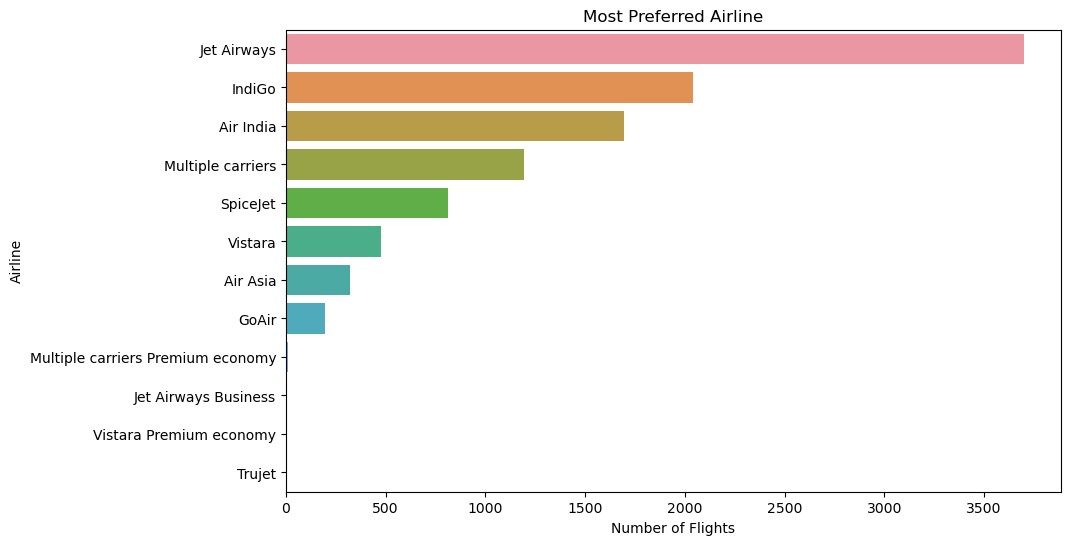

In [8]:
# Airline frequency
plt.figure(figsize=(10, 6))
sns.countplot(y="Airline", data=df_train, order=df_train['Airline'].value_counts().index)
plt.title("Most Preferred Airline")
plt.xlabel("Number of Flights")
plt.ylabel("Airline")
plt.show()

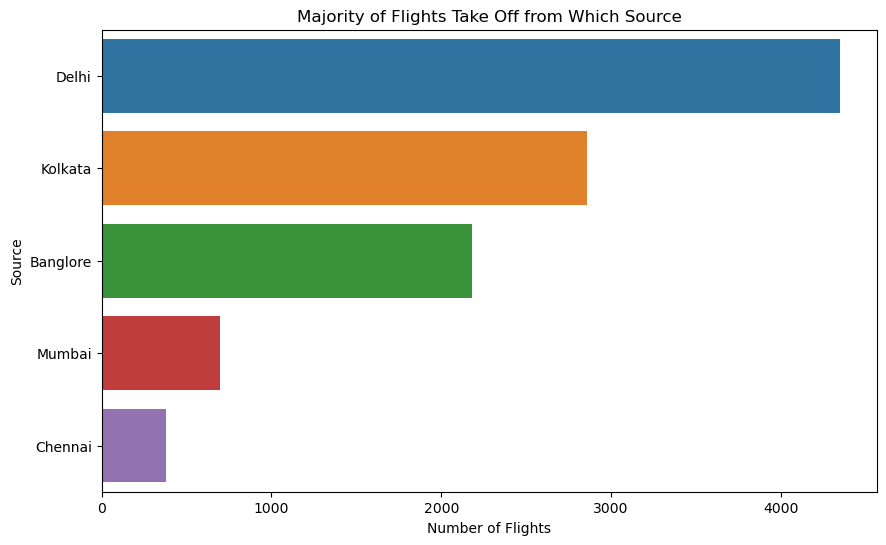

In [9]:
# Source frequency
plt.figure(figsize=(10, 6))
sns.countplot(y="Source", data=df_train, order=df_train['Source'].value_counts().index)
plt.title("Majority of Flights Take Off from Which Source")
plt.xlabel("Number of Flights")
plt.ylabel("Source")
plt.show()

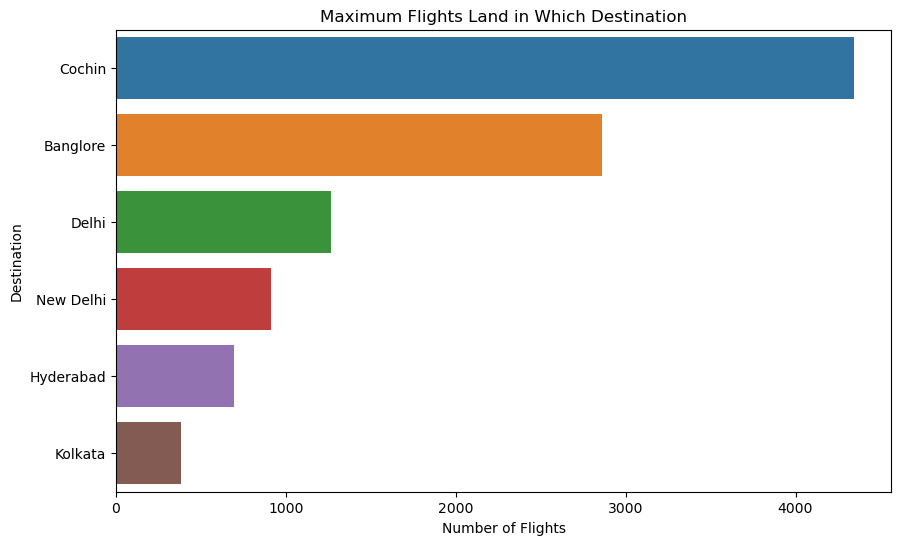

In [10]:
# Destination frequency
plt.figure(figsize=(10, 6))
sns.countplot(y="Destination", data=df_train, order=df_train['Destination'].value_counts().index)
plt.title("Maximum Flights Land in Which Destination")
plt.xlabel("Number of Flights")
plt.ylabel("Destination")
plt.show()

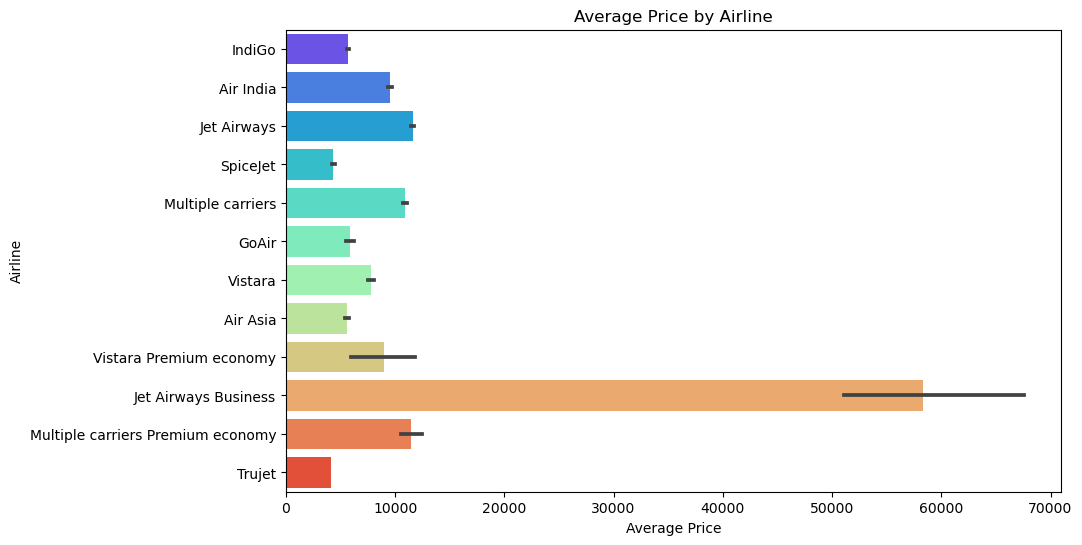

In [11]:
# Plotting the average price by airline
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train,y=df_train['Airline'], x=df_train['Price'],palette='rainbow')
plt.title("Average Price by Airline")
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.show()

In [12]:
high_price_business_flights = df_train[(df_train['Additional_Info'] == 'Business class') & (df_train['Price'] > 50000)]
print(f"\nNumber of Business class flights with price higher than 50,000: {high_price_business_flights.shape[0]}")


Number of Business class flights with price higher than 50,000: 3


In [13]:
df_train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,No info,12648,1,3,2019


In [14]:
colname = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']


# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df_train[x]=le.fit_transform(df_train[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Airline
mapping {'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}
Feature Source
mapping {'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}
Feature Destination
mapping {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5}
Feature Total_Stops
mapping {'1 stop': 0, '2 stops': 1, '3 stops': 2, '4 stops': 3, 'non-stop': 4}
Feature Additional_Info
mapping {'1 Long layover': 0, '1 Short layover': 1, '2 Long layover': 2, 'Business class': 3, 'Change airports': 4, 'In-flight meal not included': 5, 'No Info': 6, 'No check-in baggage included': 7, 'No info': 8, 'Red-eye flight': 9}


In [15]:
df_train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,2h 50m,4,8,3897,24,3,2019
1,1,3,0,7h 25m,1,8,7662,1,5,2019
2,4,2,1,19h,1,8,13882,9,6,2019
3,3,3,0,5h 25m,0,8,6218,12,5,2019
4,3,0,5,4h 45m,0,8,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2h 30m,4,8,4107,9,4,2019
10679,1,3,0,2h 35m,4,8,4145,27,4,2019
10680,4,0,2,3h,4,8,7229,27,4,2019
10681,10,0,5,2h 40m,4,8,12648,1,3,2019


In [16]:
# Function to convert duration to minutes
def duration_to_minutes(duration):
    try:
        hours, minutes = duration.split('h ')
        return int(hours) * 60 + int(minutes[:-1])
    except ValueError:
        try:
            return int(duration.split('h')[0]) * 60
        except ValueError:
            return None  # Handle missing or inconsistent data

# Convert Duration to minutes
df_train['Duration_Minutes'] = df_train['Duration'].apply(duration_to_minutes)

In [17]:
df_train.drop(columns=['Duration'], inplace=True)

In [18]:
df_train.isnull().sum()
df_train.dropna(inplace=True)

In [19]:
y=df_train['Price']
x=df_train.drop(columns=['Price'])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(Y_test, y_pred_lr)
r2_lr = r2_score(Y_test, y_pred_lr)
rmse_lr=np.sqrt(mse_lr)
mae_lr=mean_absolute_error(Y_test,y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}, RMSE: {rmse_lr}, MAE: {mae_lr}")

Linear Regression - MSE: 10852183.969571233, R2: 0.4263143807633284, RMSE: 3294.2653156009205, MAE: 2449.1937357662187


In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(Y_test,y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}")

Random Forest - MSE: 3173135.684566249, R2: 0.8322565932141776, RMSE: 1781.3297517770957, MAE: 895.8417676602868


In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(Y_test, y_pred_dt)
r2_dt = r2_score(Y_test, y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
mae_dt=mean_absolute_error(Y_test,y_pred_dt)
print(f"Decision Tree - MSE: {mse_dt}, R2: {r2_dt}, RMSE: {rmse_dt}, MAE: {mae_dt}")

Decision Tree - MSE: 5537717.8678084845, R2: 0.7072562432539364, RMSE: 2353.2356167218963, MAE: 1018.7319641021504


In [25]:
svr_model = SVR()
svr_model.fit(X_train, Y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(Y_test, y_pred_svr)
r2_svr = r2_score(Y_test, y_pred_svr)
rmse_svr=np.sqrt(mse_svr)
mae_svr=mean_absolute_error(Y_test,y_pred_svr)
print(f"SVR - MSE: {mse_svr}, R2: {r2_svr}, RMSE: {rmse_svr}, MAE: {mae_svr}")

SVR - MSE: 17476218.7303515, R2: 0.07614399162887231, RMSE: 4180.456760971401, MAE: 3249.7261089768613


In [26]:
# Compare model performances
results = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'Decision Tree'],
    'MSE': [mse_lr, mse_rf, mse_svr, mse_dt],
    'R2': [r2_lr, r2_rf, r2_svr, r2_dt],
    'RMSE': [rmse_lr, rmse_rf, rmse_svr, rmse_dt],
    'MAE': [mae_lr, mae_rf, mae_svr, mae_dt]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE        R2         RMSE          MAE
0  Linear Regression  1.085218e+07  0.426314  3294.265316  2449.193736
1      Random Forest  3.173136e+06  0.832257  1781.329752   895.841768
2                SVR  1.747622e+07  0.076144  4180.456761  3249.726109
3      Decision Tree  5.537718e+06  0.707256  2353.235617  1018.731964


In [27]:
new_df=pd.DataFrame
new_df=X_test.copy()

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=y_pred_rf
new_df=new_df.reset_index().drop("index", axis=1)

new_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes,Actual sales,Predicted sales
0,10,3,0,0,8,1,4,2019,1555.0,7980,8484.430000
1,3,1,4,4,8,18,5,2019,140.0,3858,3979.566036
2,6,2,1,0,8,1,6,2019,455.0,10261,7529.972000
3,1,4,3,4,8,21,5,2019,85.0,3100,3100.376381
4,4,0,2,4,8,3,5,2019,180.0,7229,7229.000000
...,...,...,...,...,...,...,...,...,...,...,...
2088,3,0,5,0,6,1,3,2019,285.0,8064,11257.040000
2089,6,2,1,0,8,18,5,2019,760.0,7670,9321.940000
2090,2,2,1,0,8,3,6,2019,370.0,6976,5704.220000
2091,6,2,1,0,8,27,5,2019,570.0,13377,13592.870000


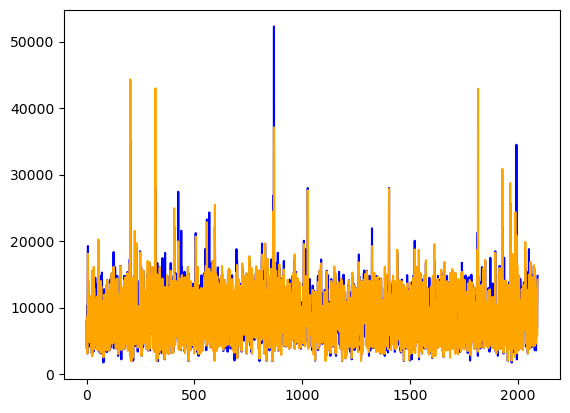

In [28]:
new_df['Actual sales'].plot(color='Blue')
new_df['Predicted sales'].plot(color='orange')
plt.show()

In [29]:
new_df['residual']=new_df['Actual sales']-new_df['Predicted sales']
#new_df.to_excel('Sales Prediction.xlsx',header=True,index=True)
new_df.head(20)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes,Actual sales,Predicted sales,residual
0,10,3,0,0,8,1,4,2019,1555.0,7980,8484.430000,-504.430000
1,3,1,4,4,8,18,5,2019,140.0,3858,3979.566036,-121.566036
2,6,2,1,0,8,1,6,2019,455.0,10261,7529.972000,2731.028000
3,1,4,3,4,8,21,5,2019,85.0,3100,3100.376381,-0.376381
4,4,0,2,4,8,3,5,2019,180.0,7229,7229.000000,0.000000
5,6,2,1,0,8,24,6,2019,930.0,13377,12506.966667,870.033333
6,4,2,1,1,8,3,3,2019,1365.0,19266,18107.100000,1158.900000
7,4,0,2,4,8,6,5,2019,180.0,7229,7229.000000,0.000000
8,3,3,0,4,8,1,3,2019,165.0,6565,5015.448488,1549.551512
9,6,2,1,0,8,21,3,2019,835.0,7695,11323.940000,-3628.940000


# Random Forest outperforms the other models consistently across all metrics.
# It has the lowest MSE, RMSE, and MAE, indicating better accuracy and predictive performance.
# It also has the highest R-squared score, indicating a better fit to the data.

In [30]:
rf_model = RandomForestRegressor(n_estimators=10000, random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(Y_test,y_pred_rf)
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}")

Random Forest - MSE: 3172857.251052646, R2: 0.832271312214806, RMSE: 1781.251596785992, MAE: 891.7986884719473


In [31]:
new_df=pd.DataFrame
new_df=X_test.copy()

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=y_pred_rf
new_df=new_df.reset_index().drop("index", axis=1)

new_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes,Actual sales,Predicted sales
0,10,3,0,0,8,1,4,2019,1555.0,7980,8441.488800
1,3,1,4,4,8,18,5,2019,140.0,3858,3947.715538
2,6,2,1,0,8,1,6,2019,455.0,10261,7902.550656
3,1,4,3,4,8,21,5,2019,85.0,3100,3088.387227
4,4,0,2,4,8,3,5,2019,180.0,7229,7229.000000
...,...,...,...,...,...,...,...,...,...,...,...
2088,3,0,5,0,6,1,3,2019,285.0,8064,11537.388798
2089,6,2,1,0,8,18,5,2019,760.0,7670,8843.465229
2090,2,2,1,0,8,3,6,2019,370.0,6976,5792.799535
2091,6,2,1,0,8,27,5,2019,570.0,13377,13513.183997


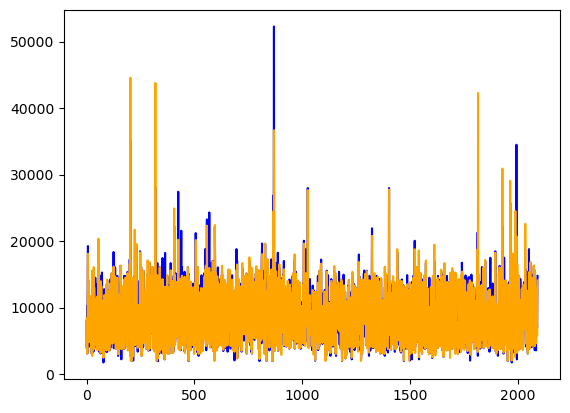

In [32]:
new_df['Actual sales'].plot(color='Blue')
new_df['Predicted sales'].plot(color='orange')
plt.show()

In [33]:
# Shape of the dataset
print("\nShape of the dataset:", df_test.shape)

# Checking for duplicates
print("\nDuplicates:", df_test.duplicated().sum())

# Checking for null values
print("\nNull values:")
print(df_test.isnull().sum())

# Checking for data summerie
df_test.describe(include='all')


Shape of the dataset: (2671, 10)

Duplicates: 26

Null values:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [34]:
# Droping duplicates and Null values
df_test.drop_duplicates(inplace=True)
df_test.dropna(inplace=True)

# Converting 'Date' to datetime format
df_test['Date_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey'], format='%d/%m/%Y')

# Extract day, month, year
df_test['Day'] = df_test['Date_of_Journey'].dt.day
df_test['Month'] = df_test['Date_of_Journey'].dt.month
df_test['Year'] = df_test['Date_of_Journey'].dt.year

# Droping 'Route' because Route and Total_Stops shows the same information
df_test.drop(columns=['Route'], inplace=True)
df_test.drop(columns=['Dep_Time'], inplace=True)
df_test.drop(columns=['Arrival_Time'], inplace=True)
df_test.drop(columns=['Date_of_Journey'], inplace=True)


# Shape of the dataset
print("\nShape of the dataset:", df_test.shape)


Shape of the dataset: (2645, 9)


In [35]:
# Function to convert duration to minutes
def duration_to_minutes(duration):
    try:
        hours, minutes = duration.split('h ')
        return int(hours) * 60 + int(minutes[:-1])
    except ValueError:
        try:
            return int(duration.split('h')[0]) * 60
        except ValueError:
            return None  # Handle missing or inconsistent data

# Convert Duration to minutes
df_test['Duration_Minutes'] = df_test['Duration'].apply(duration_to_minutes)
df_test.drop(columns=['Duration'], inplace=True)
df_test.isnull().sum()
df_test.dropna(inplace=True)

In [36]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1 stop,No info,6,6,2019,655.0
1,IndiGo,Kolkata,Banglore,1 stop,No info,12,5,2019,240.0
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,21,5,2019,1425.0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,21,5,2019,780.0
4,Air Asia,Banglore,Delhi,non-stop,No info,24,6,2019,170.0
...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,No info,6,6,2019,1435.0
2667,IndiGo,Kolkata,Banglore,non-stop,No info,27,3,2019,155.0
2668,Jet Airways,Delhi,Cochin,1 stop,No info,6,3,2019,395.0
2669,Air India,Delhi,Cochin,1 stop,No info,6,3,2019,915.0


In [37]:
# Define mappings
airline_mapping = {'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4,
                   'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7,
                   'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}

source_mapping = {'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

destination_mapping = {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5}

stops_mapping = {'1 stop': 0, '2 stops': 1, '3 stops': 2, '4 stops': 3, 'non-stop': 4}

additional_info_mapping = {'1 Long layover': 0, '1 Short layover': 1, '2 Long layover': 2, 'Business class': 3,
                           'Change airports': 4, 'In-flight meal not included': 5, 'No Info': 6,
                           'No check-in baggage included': 7, 'No info': 8, 'Red-eye flight': 9}

# Replace categorical values with numerical representations using mappings
df_test.replace({'Airline': airline_mapping,
            'Source': source_mapping,
            'Destination': destination_mapping,
            'Total_Stops': stops_mapping,
            'Additional_Info': additional_info_mapping}, inplace=True)

# Print the DataFrame after encoding
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes
0,4,2,1,0,8,6,6,2019,655.0
1,3,3,0,0,8,12,5,2019,240.0
2,4,2,1,0,5,21,5,2019,1425.0
3,6,2,1,0,8,21,5,2019,780.0
4,0,0,2,4,8,24,6,2019,170.0


In [38]:
# Make predictions on unseen test data
pred_unseen_test = rf_model.predict(df_test)

print("Predicted Prices for Unseen Data:")
print(pred_unseen_test)


df_test["Rredicted sales"]=pred_unseen_test

Predicted Prices for Unseen Data:
[14862.4181   4436.88485 12898.      ... 16028.7245  12437.7441
  7297.09541]


In [39]:
df_test

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Duration_Minutes,Rredicted sales
0,4,2,1,0,8,6,6,2019,655.0,14862.418100
1,3,3,0,0,8,12,5,2019,240.0,4436.884850
2,4,2,1,0,5,21,5,2019,1425.0,12898.000000
3,6,2,1,0,8,21,5,2019,780.0,12753.438886
4,0,0,2,4,8,24,6,2019,170.0,4036.694959
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,8,6,6,2019,1435.0,9936.962200
2667,3,3,0,4,8,27,3,2019,155.0,4635.517520
2668,4,2,1,0,8,6,3,2019,395.0,16028.724500
2669,1,2,1,0,8,6,3,2019,915.0,12437.744100
